# Laboratorio 2. Práctica 2 - MLP con Keras
## Preparación de entorno
### Gonzalo de las Heras
### Jorge de la Fuente
#### Importar librerías de código

In [1]:
# Aquí se importan las librerias que se van a utiliar

%reset

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
import keras.optimizers
import math
import matplotlib.pyplot as plt

%matplotlib inline

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Using TensorFlow backend.


### Implementación 1. Resolución XOR. Optimizador Adam.

------------
Resultados
------------

[0,0] => ( 0 ), valor obtenido:  0.000608481
[0,1] => ( 1 ), valor obtenido:  0.997763
[1,0] => ( 1 ), valor obtenido:  0.999616
[1,1] => ( 0 ), valor obtenido:  0.00200143

------------
Gráfica
------------


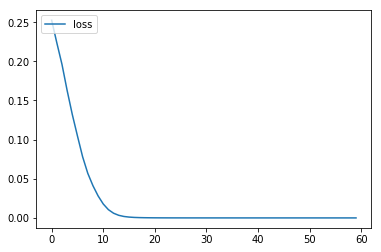

4/4 [==============================] - 0s 21ms/step

Score: 0.0000024.



In [8]:
# Entradas XOR
entradas_XOR = np.array([[0,0],[0,1],[1,0],[1,1]])

# Salida esperada XOR
resultados_XOR = np.array([[0],[1],[1],[0]])

# Aquitectura de la red neuronal
# Totalmente conectada
model = Sequential()

# 2 neuronas en la capa de entrada, X neuronas en la capa oculta con función de activación ReLU
model.add(Dense(units=15, activation='relu', input_dim=2))

# 2 neuronas en la capa de salida con función de acticación sigmoide (la salida debe ser entre 0 y 1)
model.add(Dense(units=1, activation='sigmoid'))

# Función de error "Mean Squared Error", optimizador "Adam", coeficiente de aprendizaje "0.1"
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr = 0.1))

# Entrenamiento con 60 iteraciones
datos_entrenamiento = model.fit(entradas_XOR, resultados_XOR, epochs=60, verbose=0)

# Predicción de XOR
predicciones = model.predict(entradas_XOR)

# Impresión de los resultados
print("------------")
print("Resultados")
print("------------\n")
print("[0,0] => (" , int(round(predicciones[0][0], 0)) , "), valor obtenido: " , predicciones[0][0])
print("[0,1] => (" , int(round(predicciones[1][0], 0)) , "), valor obtenido: " , predicciones[1][0])
print("[1,0] => (" , int(round(predicciones[2][0], 0)) , "), valor obtenido: " , predicciones[2][0])
print("[1,1] => (" , int(round(predicciones[3][0], 0)) , "), valor obtenido: " , predicciones[3][0])

# Gráfica del parámetro loss
plt.plot(datos_entrenamiento.history['loss'], label='loss')
plt.legend(loc='upper left')
print("\n------------")
print("Gráfica")
print("------------")
plt.show()

# Cálculo del score de la red
score = model.evaluate(entradas_XOR, resultados_XOR)

# Impresión del error
print("\nScore: %.7f." % (score) + "\n")

### Modelo alternativo. Optimizador SGD (Stochastic Gradient Descent).

------------
Resultados
------------

[0,0] => ( 0 ), valor obtenido:  0.0705402
[0,1] => ( 1 ), valor obtenido:  0.953185
[1,0] => ( 1 ), valor obtenido:  0.954757
[1,1] => ( 0 ), valor obtenido:  0.0413044

------------
Gráfica
------------


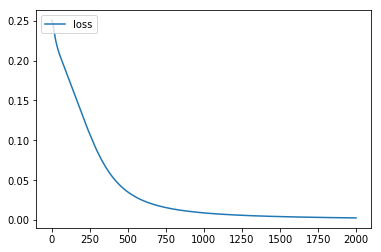

4/4 [==============================] - 0s 29ms/step

Score: 0.0027301.



In [14]:
# Entradas XOR
entradas_XOR = np.array([[0,0],[0,1],[1,0],[1,1]])

# Salida esperada XOR
resultados_XOR = np.array([[0],[1],[1],[0]])

# Aquitectura de la red neuronal
# Totalmente conectada
model = Sequential()

# 2 neuronas en la capa de entrada, X neuronas en la capa oculta con función de activación ReLU
model.add(Dense(units=35, activation='relu', input_dim=2))

# 2 neuronas en la capa de salida con función de acticación sigmoide (la salida debe ser entre 0 y 1)
model.add(Dense(units=1, activation='sigmoid'))

# Función de error "Mean Squared Error", optimizador "SGD", coeficiente de aprendizaje "0.01", decay "1e-6", momento "0.9"
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9))

# Entrenamiento con 2000 iteraciones
datos_entrenamiento = model.fit(entradas_XOR, resultados_XOR, epochs=2000, verbose=0)

# Predicción de XOR
predicciones = model.predict(entradas_XOR)

# Impresión de los resultados
print("------------")
print("Resultados")
print("------------\n")
print("[0,0] => (" , int(round(predicciones[0][0], 0)) , "), valor obtenido: " , predicciones[0][0])
print("[0,1] => (" , int(round(predicciones[1][0], 0)) , "), valor obtenido: " , predicciones[1][0])
print("[1,0] => (" , int(round(predicciones[2][0], 0)) , "), valor obtenido: " , predicciones[2][0])
print("[1,1] => (" , int(round(predicciones[3][0], 0)) , "), valor obtenido: " , predicciones[3][0])

# Gráfica de evolución del parámetro loss
plt.plot(datos_entrenamiento.history['loss'], label='loss')
plt.legend(loc='upper left')
print("\n------------")
print("Gráfica")
print("------------")
plt.show()

# Cálculo del score de la red
score = model.evaluate(entradas_XOR, resultados_XOR)

# Impresión del score
print("\nScore: %.7f." % (score) + "\n")

### Implementación 2. Entrenamiento con varios coeficientes de aprendizaje (η).


Score: 347.6674661, coeficiente: 1e-07


Score: 166.1321063, coeficiente: 0.01


Score: 677.1621030, coeficiente: 0.1


Score: 677.1621030, coeficiente: 1.0


------------
Gráfica
------------


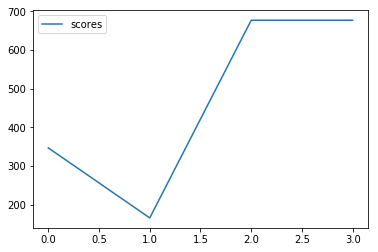

In [4]:
# Coeficientes de aprendizaje
coeficientes = np.array([0.0000001, 0.01, 0.1, 1])

# Scores
scores = np.array([0, 0, 0, 0])

# Obtención de los datos de entrada
entrada = np.array(pd.read_csv('../Datos/p2_entrenamiento.csv', header=None))

# Obtención de la salida deseada
salida_esperada = np.array(pd.read_csv('../Datos/p2_objetivos.csv', header=None))

for i in range(0, 4):

    # Aquitectura de la red neuronal
    # Totalmente conectada
    model = Sequential()

    # 240 neuronas en la capa de entrada, 80 neuronas en la capa oculta (según el csv aportado) con función de activación ReLU
    model.add(Dense(units=80, activation='linear', input_dim=9))

    # 1 neurona en la capa de salida con función de acticación relu (la salida debe ser entre 0 e ∞)
    model.add(Dense(units=1, activation='relu'))

    # Función de error "Mean Squared Error", optimizador "Adam", coeficiente de aprendizaje según interación, el resto de 
    # hiperparámetros por defecto
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr = coeficientes[i]))

    # Entrenamiento con 200 iteraciones, datos divididos en: 80% entranamiento, 20% validación 
    model.fit(entrada, salida_esperada, epochs=200, verbose=0, validation_split=0.2)

    # Cálculo del porcentaje de error
    score = model.evaluate(entrada, salida_esperada, verbose= 0)

    # Impresión del score
    print("\nScore: %.7f" % (score) + ", coeficiente: " + str(coeficientes[i]) + "\n")
    
    # Guardado del score
    scores[i] = score

# Gráfica de evolución del parámetro loss
plt.plot(scores, label='scores')
plt.legend(loc='upper left')
print("\n------------")
print("Gráfica")
print("------------")
plt.show()

### Modelo alternativo. Optimizador SGD (Stochastic Gradient Descent).


Score: 228.8709050, coeficiente: 1e-07


Score: nan, coeficiente: 0.01


Score: nan, coeficiente: 0.1


Score: nan, coeficiente: 1.0


------------
Gráfica
------------


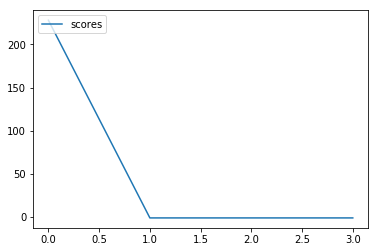

In [5]:
# Coeficientes de aprendizaje
coeficientes = np.array([0.0000001, 0.01, 0.1, 1])

# Scores
scores = np.array([0, 0, 0, 0])

# Obtención de los datos de entrada
entrada = np.array(pd.read_csv('../Datos/p2_entrenamiento.csv', header=None))

# Obtención de la salida deseada
salida_esperada = np.array(pd.read_csv('../Datos/p2_objetivos.csv', header=None))

for i in range(0, 4):

    # Aquitectura de la red neuronal
    # Totalmente conectada
    model = Sequential()

    # 240 neuronas en la capa de entrada, 9 neuronas en la capa oculta (según el csv aportado) con función de activación ReLU
    model.add(Dense(units=80, activation='linear', input_dim=9))

    # 1 neurona en la capa de salida con función de acticación relu (la salida debe ser entre 0 e ∞)
    model.add(Dense(units=1, activation='relu'))

    # Función de error "Mean Squared Error", optimizador "SGD", coeficiente de aprendizaje según iteración, el resto de 
    # hiperparámetros por defecto
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=coeficientes[i]))

    # Entrenamiento con 200 iteraciones, datos divididos en: 80% entranamiento, 20% validación 
    model.fit(entrada, salida_esperada, epochs=200, verbose=0, validation_split=0.2)

    # Cálculo del score
    score = model.evaluate(entrada, salida_esperada, verbose= 0)

    # Impresión del score
    print("\nScore: %.7f" % (score) + ", coeficiente: " + str(coeficientes[i]) + "\n")    

    # Guardado del score
    if float('-inf') < score < float('inf'):        
        scores[i] = score
    else:
        scores[i] = -1

# Gráfica de evolución del parámetro loss
plt.plot(scores, label='scores')
plt.legend(loc='upper left')
print("\n------------")
print("Gráfica")
print("------------")
plt.show()